In [24]:
import sympy as sp
from mira.metamodel import *
from mira.sources.sympy_ode import template_model_from_sympy_odes
from mira.modeling.amr.petrinet import template_model_to_petrinet_json_file

# Define time variable
t = sp.symbols("t")

# Define time-dependent variables
S_l, S_h, E_h, P, I1, I2, H, R_h, S_r, E_r, I_r, R_r = sp.symbols(
    "S_l S_h E_h P I1 I2 H R_h S_r E_r I_r R_r", cls=sp.Function
)

# Define the parameters with spelled-out names
eta, alpha, beta_hh, beta_rr, beta_rh, pi_h, rho, nu, lambda_h, mu_h, sigma_h, omega, theta, k1, k2, tau1, tau2, tau3, delta_h, pi_r, lambda_r, mu_r, sigma_r, delta_r, tau_r = sp.symbols(
    "eta alpha beta_hh beta_rr beta_rh pi_h rho nu lambda_h mu_h sigma_h omega theta k1 k2 tau1 tau2 tau3 delta_h pi_r lambda_r mu_r sigma_r delta_r tau_r"
)

# Define the system of ODEs
N_h = S_h(t) + S_l(t) + E_h(t) + P(t) + I1(t) + I2(t) + H(t) + R_h(t)
N_r = S_r(t) + E_r(t) + I_r(t) + R_r(t)
lambda_h = beta_hh * (alpha*P(t) + eta*I1(t) + I2(t)) / N_h + beta_rh * I_r(t) / N_r
lambda_r = beta_rr * I_r(t) / N_r

odes4 = [
    sp.Eq(S_l(t).diff(t), pi_h * (1 - rho) - nu * lambda_h * S_l(t) - mu_h * S_l(t)),
    sp.Eq(S_h(t).diff(t), pi_h * rho - lambda_h * S_h(t) - mu_h * S_h(t)),
    sp.Eq(E_h(t).diff(t), nu * S_l(t) * lambda_h + S_h(t) * lambda_h - (sigma_h + mu_h) * E_h(t)),
    sp.Eq(P(t).diff(t), sigma_h * E_h(t) - (omega + mu_h) * P(t)),
    sp.Eq(I1(t).diff(t), omega * P(t) - (theta + k1 + tau1 + mu_h) * I1(t)),
    sp.Eq(I2(t).diff(t), theta * I1(t) - (k2 + delta_h + tau2 + mu_h) * I2(t)),
    sp.Eq(H(t).diff(t), k1 * I1(t) + k2 * I2(t) - (delta_h + tau3 + mu_h) * H(t)),
    sp.Eq(R_h(t).diff(t), tau1 * I1(t) + tau2 * I2(t) + tau3 * H(t) - mu_h * R_h(t)),
    sp.Eq(S_r(t).diff(t), pi_r - lambda_r * S_r(t) - mu_r * S_r(t)),
    sp.Eq(E_r(t).diff(t), lambda_r * S_r(t) - (sigma_r + mu_r) * E_r(t)),
    sp.Eq(I_r(t).diff(t), sigma_r * E_r(t) - (delta_r + tau_r + mu_r) * I_r(t)),
    sp.Eq(R_r(t).diff(t), tau_r * I_r(t) - mu_r * R_r(t)),
]

concept_data = {
    'S_l': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'low', 'species': 'ncbitaxon:9606'}},
    'S_h': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'high', 'species': 'ncbitaxon:9606'}},
    'E_h': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9606'}},
    'P': {'identifiers': {'ido': '0000511'},
          'context': {'stage': 'predromal', 'species': 'ncbitaxon:9606'}},
    'I1': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'mild', 'species': 'ncbitaxon:9606'}},
    'I2': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'severe', 'species': 'ncbitaxon:9606'}},
    'H': {'identifiers': {'ido': '0000511'},
         'context': {'hospitalization': 'ncit:C25179', 'species': 'ncbitaxon:9606'}},
    'R_h': {'identifiers': {'ido': '0000592'},
         'context': {'species': 'ncbitaxon:9606'}},
    'S_r': {'identifiers': {'ido': '0000514'},
            'context': {'species': 'ncbitaxon:9989'}},
    'E_r': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9989'}},
    'I_r': {'identifiers': {'ido': '0000511'},
           'context': {'species': 'ncbitaxon:9989'}},
    'R_r': {'identifiers': {'ido': '0000592'},
            'context': {'species': 'ncbitaxon:9989'}},
}

parameter_data = {
    'Nh': {'value': 1.8e8},
    'Nr': {'value': 0.01},
    'mu_h': {'value': 0.000045},
    'mu_r': {'value': 0.002},
    'pi_h': {'value': 2500},
    'pi_r': {'value': 0.5},
    'rho': {'value': 0.8},
    'nu': {'value': 0.045},
    'beta_hh': {'value': 0.03},
    'beta_rh': {'value': 0.3045},
    'beta_rr': {'value': 0.025},
    'alpha': {'value': 0.75},
    'eta': {'value': 0.8},
    'sigma_h': {'value': 0.033},
    'sigma_r': {'value': 0.0083},
    'omega': {'value': 0.0042},
    'theta': {'value': 0.021},
    'k1': {'value': 0.2},
    'k2': {'value': 0.4},
    'tau1': {'value': 0.048},
    'tau2': {'value': 0.05},
    'tau3': {'value': 0.056},
    'tau_r': {'value': 0.083},
    'delta_i': {'value': 0.0011},
    'delta_h': {'value': 0.001},
    'delta_r': {'value': 0.057},
}

# The initial conditions employed are given: 
#. 𝑆𝑙(0)=12×107
#, 𝑆ℎ(0)=6×107
#, 𝐸ℎ(0)=2000
#, 𝑃(0)=70
#, 𝐼1(0)=2
#, 𝐼2(0)=1
#, 𝐻(0)=1
#, 𝑅ℎ(0)=0
#, 𝑆𝑟(0)=𝑆ℎ(0)×10−2
#, 𝐸𝑟(0)=800
#, 𝐼𝑟(0)=16
#, 𝑅𝑟(0)=2
#.

initials = {
    'S_l': Initial(concept=Concept(name='S_l'), expression=SympyExprStr(sp.Float(12e7))),
    'S_h': Initial(concept=Concept(name='S_h'), expression=SympyExprStr(sp.Float(6e7))),
    'E_h': Initial(concept=Concept(name='E_h'), expression=SympyExprStr(sp.Float(2000))),
    'P': Initial(concept=Concept(name='P'), expression=SympyExprStr(sp.Float(70))),
    'I1': Initial(concept=Concept(name='I1'), expression=SympyExprStr(sp.Float(2))),
    'I2': Initial(concept=Concept(name='I2'), expression=SympyExprStr(sp.Float(1))),
    'H': Initial(concept=Concept(name='H'), expression=SympyExprStr(sp.Float(1))),
    'R_h': Initial(concept=Concept(name='R_h'), expression=SympyExprStr(sp.Float(0))),
    'S_r': Initial(concept=Concept(name='S_r'), expression=SympyExprStr(sp.Float(6e5))),
    'E_r': Initial(concept=Concept(name='E_r'), expression=SympyExprStr(sp.Float(800))),
    'I_r': Initial(concept=Concept(name='I_r'), expression=SympyExprStr(sp.Float(16))),
    'R_r': Initial(concept=Concept(name='R_r'), expression=SympyExprStr(sp.Float(2))),
}

In [25]:
tm = template_model_from_sympy_odes(odes4, param_data=parameter_data, concept_data=concept_data)
tm.initials = initials

In [26]:
template_model_to_petrinet_json_file(tm, 'ModelA_base_petri.json')

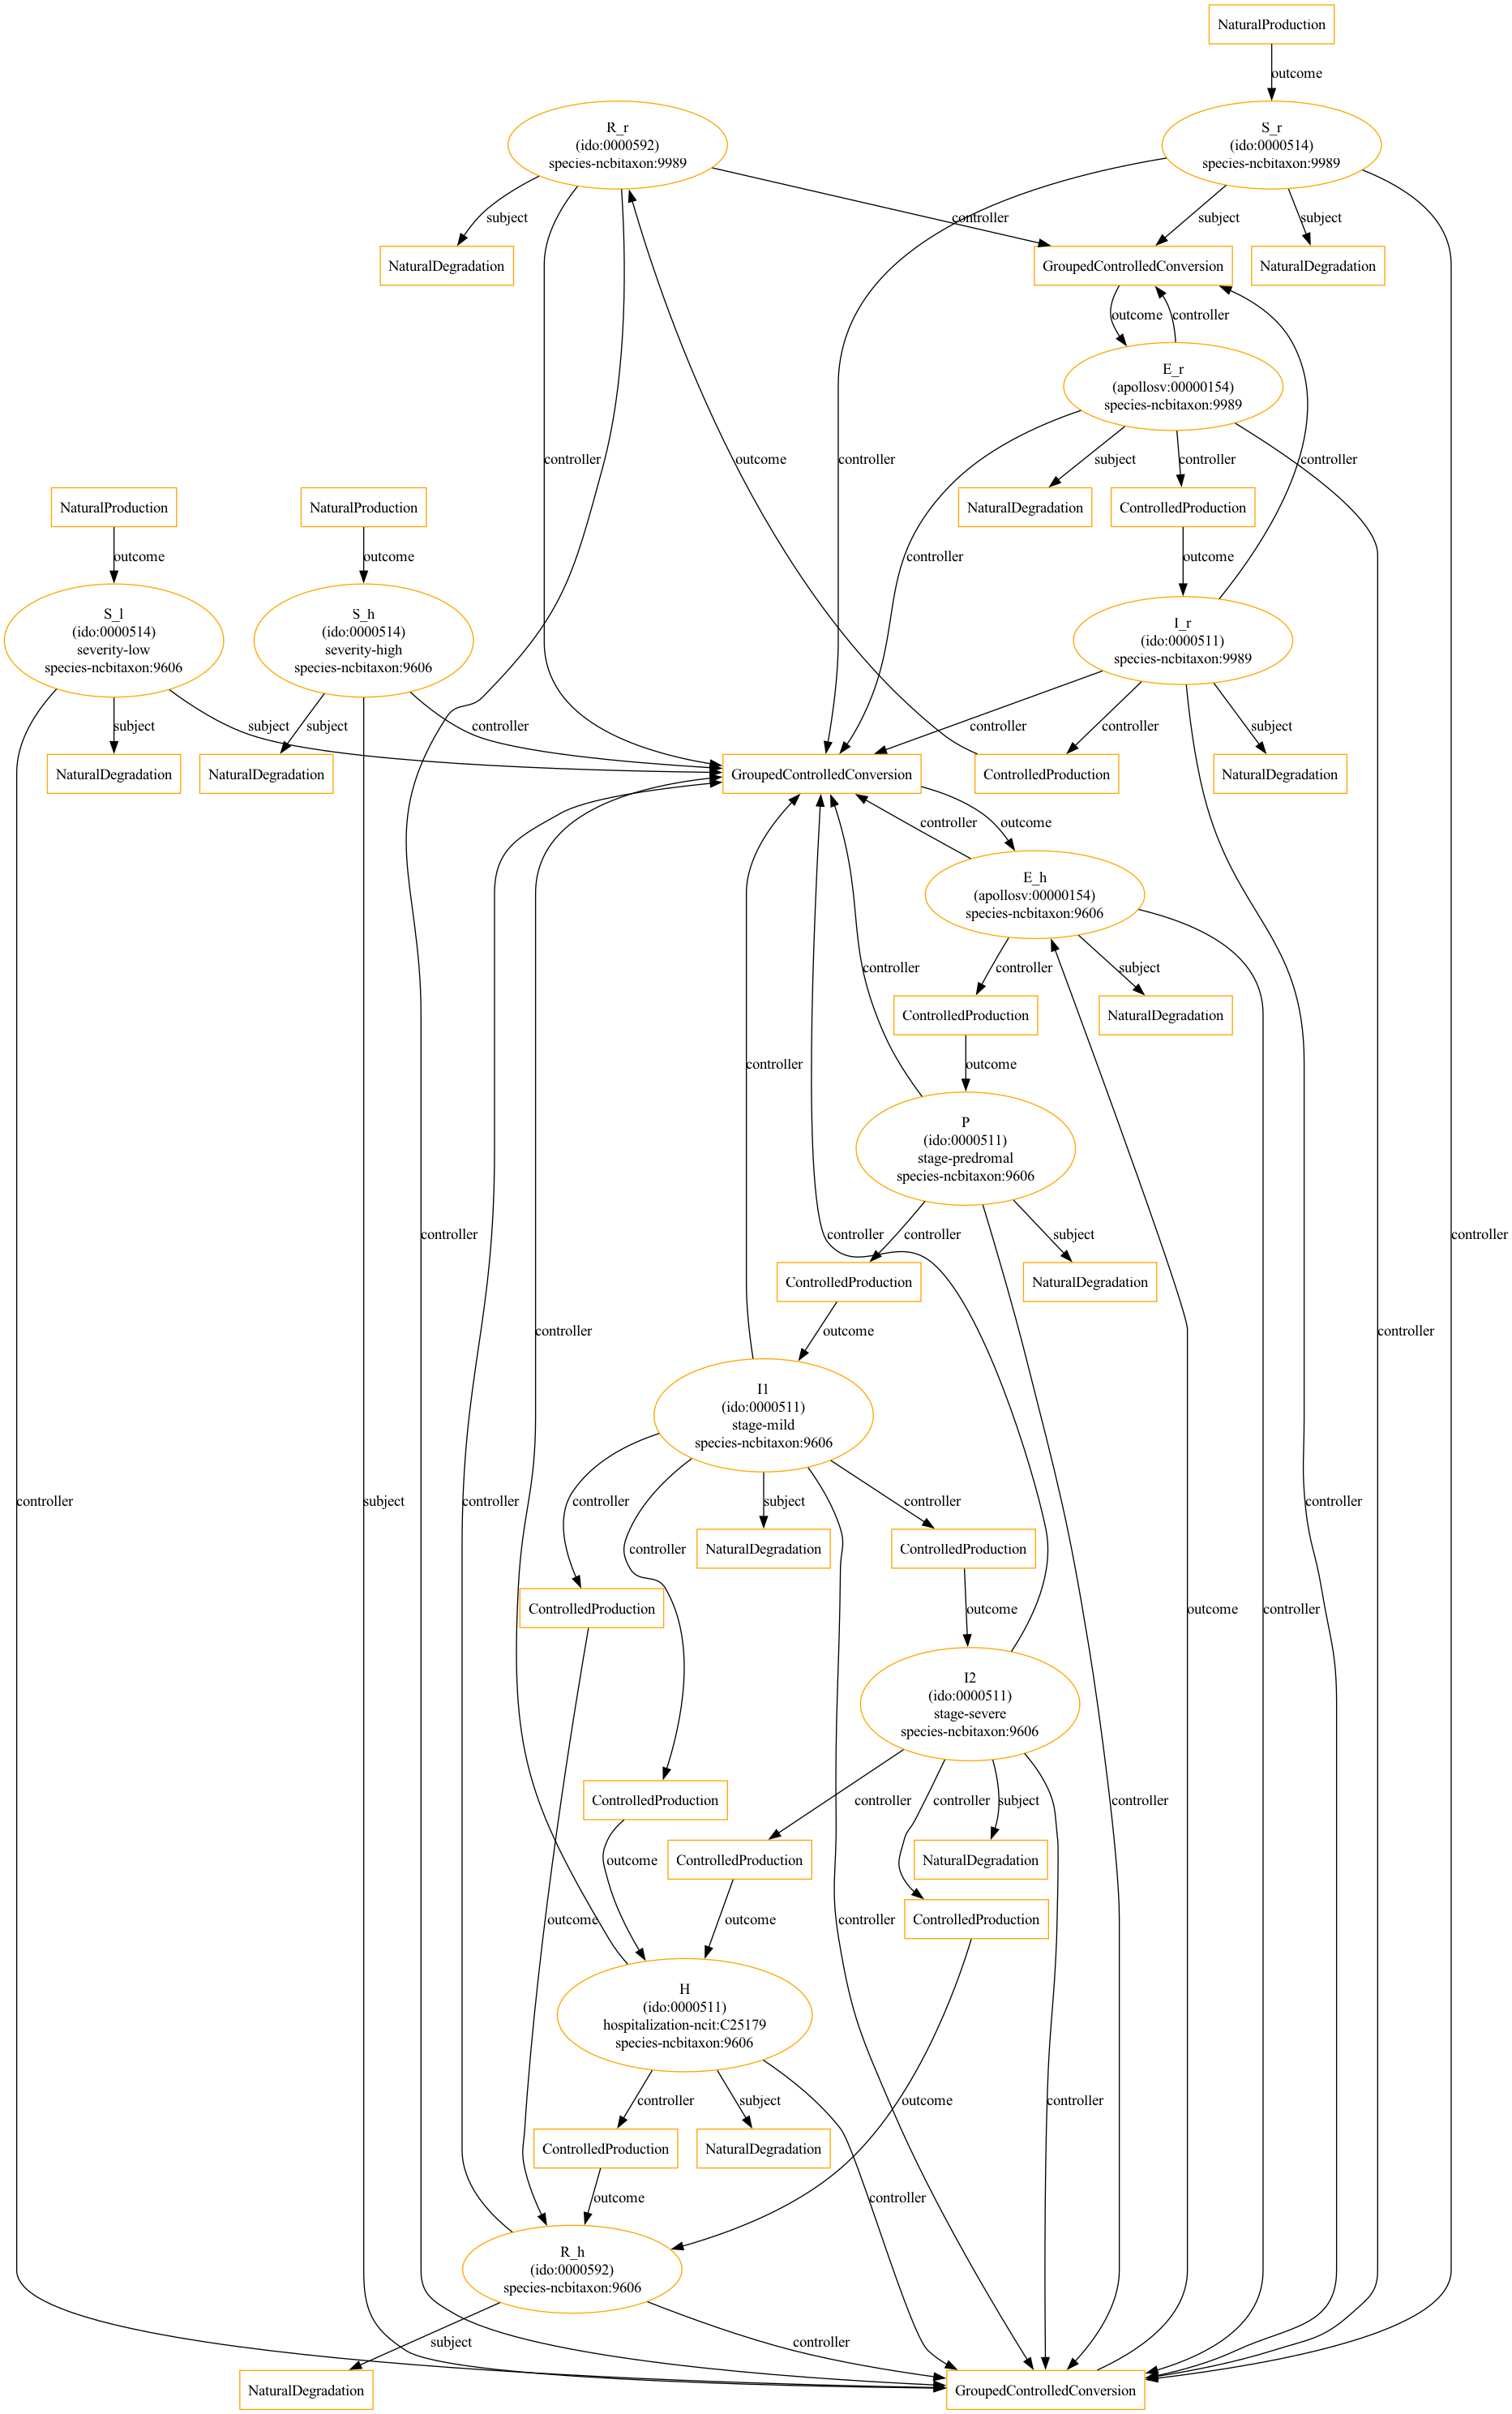

In [27]:
tm.draw_jupyter()

In [28]:
from mira.modeling import Model
from mira.modeling.ode import OdeModel, simulate_ode_model

In [29]:
om = OdeModel(Model(tm), initialized=True)

In [30]:
om.get_interpretable_kinetics()

Matrix([
[                                                                                                                   S_l*mu_h - S_l*nu*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l)) + pi_h*(1 - rho)],
[                                                                                                                                                                                                                                                   I_r*tau_r + R_r*mu_r],
[                                                                                                                                                                                                                                         E_h*sigma_h + P*(mu_h + omega)],
[E_h*(mu_h + sigma_h) + S_h*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l)) + S_l*nu*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + 

In [31]:
import numpy as np
res = simulate_ode_model(om, np.linspace(0, 100, 100))

In [32]:
res[:, 0]

array([1.20000000e+08, 1.20005902e+08, 1.20011776e+08, 1.20017617e+08,
       1.20023419e+08, 1.20029176e+08, 1.20034882e+08, 1.20040528e+08,
       1.20046105e+08, 1.20051601e+08, 1.20057005e+08, 1.20062301e+08,
       1.20067473e+08, 1.20072502e+08, 1.20077364e+08, 1.20082035e+08,
       1.20086484e+08, 1.20090676e+08, 1.20094572e+08, 1.20098125e+08,
       1.20101281e+08, 1.20103976e+08, 1.20106138e+08, 1.20107679e+08,
       1.20108497e+08, 1.20108471e+08, 1.20107453e+08, 1.20105266e+08,
       1.20101687e+08, 1.20096439e+08, 1.20089165e+08, 1.20079403e+08,
       1.20066539e+08, 1.20049764e+08, 1.20028006e+08, 1.19999892e+08,
       1.19963738e+08, 1.19917651e+08, 1.19859761e+08, 1.19788553e+08,
       1.19703142e+08, 1.19603322e+08, 1.19489335e+08, 1.19361531e+08,
       1.19220071e+08, 1.19064765e+08, 1.18895045e+08, 1.18709993e+08,
       1.18508404e+08, 1.18288849e+08, 1.18049735e+08, 1.17789357e+08,
       1.17505949e+08, 1.17197743e+08, 1.16863014e+08, 1.16500144e+08,
      

In [10]:
om.vmap

{('S_l',
  ('identity', 'ido:0000514'),
  ('severity', 'low'),
  ('species', 'ncbitaxon:9606')): 0,
 ('R_r', ('identity', 'ido:0000592'), ('species', 'ncbitaxon:9989')): 1,
 ('P',
  ('identity', 'ido:0000511'),
  ('species', 'ncbitaxon:9606'),
  ('stage', 'predromal')): 2,
 ('E_h', ('identity', 'apollosv:00000154'), ('species', 'ncbitaxon:9606')): 3,
 ('I_r', ('identity', 'ido:0000511'), ('species', 'ncbitaxon:9989')): 4,
 ('I2',
  ('identity', 'ido:0000511'),
  ('species', 'ncbitaxon:9606'),
  ('stage', 'severe')): 5,
 ('E_r', ('identity', 'apollosv:00000154'), ('species', 'ncbitaxon:9989')): 6,
 ('R_h', ('identity', 'ido:0000592'), ('species', 'ncbitaxon:9606')): 7,
 ('I1',
  ('identity', 'ido:0000511'),
  ('species', 'ncbitaxon:9606'),
  ('stage', 'mild')): 8,
 ('H',
  ('identity', 'ido:0000511'),
  ('hospitalization', 'ncit:C25179'),
  ('species', 'ncbitaxon:9606')): 9,
 ('S_h',
  ('identity', 'ido:0000514'),
  ('severity', 'high'),
  ('species', 'ncbitaxon:9606')): 10,
 ('S_r', ('

In [11]:
om.variable_values

[None,
 2.0,
 70.0,
 2000.0,
 16.0,
 1.0,
 800.0,
 0.0,
 2.0,
 1.0,
 60000000.0,
 600000.0]

In [23]:
for template in tm.templates:
    print(template.type, template.rate_law)

NaturalDegradation -S_l*mu_h
GroupedControlledConversion (S_h + S_l*nu)*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l))
NaturalProduction pi_h*(1 - rho)
NaturalDegradation -S_h*mu_h
NaturalProduction pi_h*rho
GroupedControlledDegradation -S_h*(I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l))
NaturalDegradation -E_h*(mu_h + sigma_h)
ControlledProduction E_h*sigma_h
NaturalDegradation -P*(mu_h + omega)
ControlledProduction P*omega
NaturalDegradation -I1*(k1 + mu_h + tau1 + theta)
ControlledProduction I1*theta
NaturalDegradation -I2*(delta_h + k2 + mu_h + tau2)
ControlledProduction I1*k1
ControlledProduction I2*k2
NaturalDegradation -H*(delta_h + mu_h + tau3)
NaturalDegradation -R_h*mu_h
ControlledProduction I1*tau1
ControlledProduction I2*tau2
ControlledProduction H*tau3
GroupedControlledConversion I_r*S_r*beta_rr/(E_r + I_r + R_r + S_r)
NaturalDegradation -S_